In [46]:
import numpy as np
from numpy import cos,sin,matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# DH-Forward Kinematics

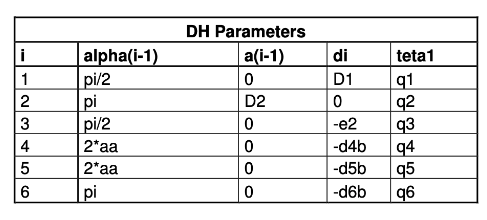
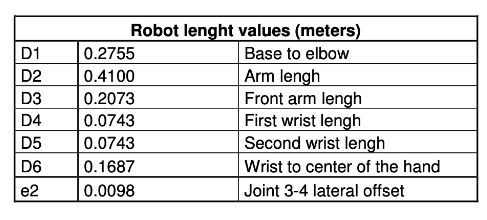
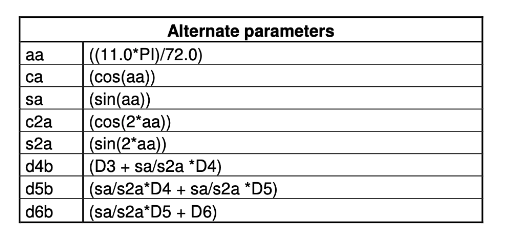


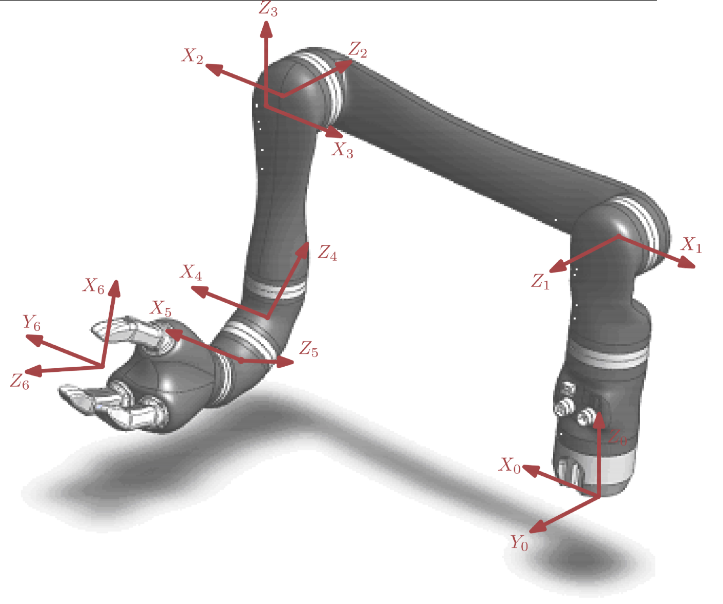

In [47]:
def dh_transform(alpha, a, d, theta):
    """
    Calculate the transformation matrix for a single DH parameter set.
    :param alpha: Link twist angle (in radians)
    :param a: Link length (in units)
    :param d: Link offset (in units)
    :param theta: Joint angle (in radians)
    :return: 4x4 transformation matrix
    """
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)

    # Construct the transformation matrix
    matrix = np.array([[cos_theta, -sin_theta*cos_alpha,  sin_theta*sin_alpha, a*cos_theta],
                       [sin_theta,  cos_theta*cos_alpha, -cos_theta*sin_alpha, a*sin_theta],
                       [        0,            sin_alpha,            cos_alpha,           d],
                       [        0,                    0,                    0,           1]])
    return matrix

def dh_to_transformation_matrices(dh_parameters):
    """
    Convert DH parameters of a robot arm to the transformation matrices for each frame.
    :param dh_parameters: List of DH parameter tuples (alpha, a, d, theta)
    :return: List of 4x4 transformation matrices for each frame
    """
    num_joints = len(dh_parameters)
    transformation_matrices = []
    previous_matrix = np.identity(4)

    for i in range(num_joints):
        alpha, a, d, theta = dh_parameters[i]
        matrix = dh_transform(alpha, a, d, theta)
        transformation_matrix = np.matmul(previous_matrix, matrix)
        transformation_matrices.append(transformation_matrix)
        previous_matrix = transformation_matrix

    return transformation_matrices


def plot_robot_arm(transforms):
    # Extract the joint positions from the transformation matrices
    joint_positions = [T[:3, 3] for T in transforms]
    
    # Extract the end effector position from the last transformation matrix
    end_effector_pos = transforms[-1][:3, 3]
    
    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the base
    base_pos = [0,0,0]
    ax.scatter(base_pos[0], base_pos[1], base_pos[2], c='b', marker='o')
    
    # Plot the links
    ax.plot([base_pos[0], joint_positions[0][0]],
            [base_pos[1], joint_positions[0][1]],
            [base_pos[2], joint_positions[0][2]], 'b')
    # Plot the links
    for i in range(len(joint_positions)-1):
        ax.plot([joint_positions[i][0], joint_positions[i+1][0]],
                [joint_positions[i][1], joint_positions[i+1][1]],
                [joint_positions[i][2], joint_positions[i+1][2]], 'b')
    
    # Plot the joints
    for joint_pos in joint_positions:
        ax.scatter(joint_pos[0], joint_pos[1], joint_pos[2], c='r', marker='o')
    
    # Plot the end effector
    ax.scatter(end_effector_pos[0], end_effector_pos[1], end_effector_pos[2], c='k', marker='o')
    
    # Set plot limits and labels
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Display the plot
    plt.show()



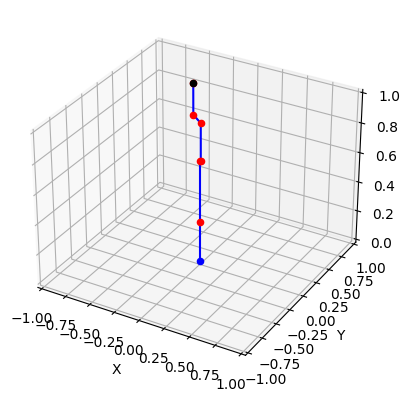

In [48]:
## DH variable [Solution 1]
D1 = 0.2755
D2 = 0.41
e2 = 0.0098
D3 = 0.2073
D4 = 0.0741
D5 = 0.0741
D6 = 0.16

aa = np.pi/6
ca = cos(aa)
sa = sin(aa)
c2a = cos(2*aa)
s2a = sin(2*aa)
d4b = (D3+(D5*(sa/s2a)))
d5b = (D4*(sa/s2a)) + (D5*(sa/s2a))
d6b = (D5*(sa/s2a)) + (D6)

q1_robot = 270
q2_robot = 180
q3_robot = 180
q4_robot = 0
q5_robot = 0
q6_robot = 0

q1 = -q1_robot
q2 =  q2_robot - 90
q3 =  q3_robot + 90
q4 =  q4_robot
q5 =  q5_robot - 180
q6 =  q6_robot + 90

q1 = np.deg2rad(q1)
q2 = np.deg2rad(q2)
q3 = np.deg2rad(q3)
q4 = np.deg2rad(q4)
q5 = np.deg2rad(q5)
q6 = np.deg2rad(q6)

# Example DH parameters for a 7-DOF JACO arm
# (alpha, a, d, theta)
dh_parameters = [
    ( np.pi/2,      0,          D1,          q1),    # frame{0} to frame{1}
    (   np.pi,     D2,           0,          q2),    # frame{1} to frame{2}
    ( np.pi/2,      0,         -e2,          q3),    # frame{2} to frame{3}
    (    2*aa,      0,        -d4b,          q4),    # frame{3} to frame{4}  
    (    2*aa,      0,        -d5b,          q5),    # frame{4} to frame{5}
    (   np.pi,      0,        -d6b,          q6)    # frame{5} to frame{6}
    # (       0,      0,      0.1214,          0)     # frame{6} to frame{7}
]

# Convert DH parameters to transformation matrix
transformation_matrix = dh_to_transformation_matrices(dh_parameters)

# Print the resulting transformation matrix
# print(transformation_matrix)
plot_robot_arm(transformation_matrix)

# Jacobian

In [49]:
import numpy as np
import sympy as sp
# init_printing("mathjax") # sympy expression printing
from sympy import sin, cos, Matrix, symbols,Function
from sympy.physics.vector import dynamicsymbols
from sympy.abc import rho, phi, alpha, theta


In [60]:
q1,q2,q3,q4,q5,q6 = dynamicsymbols('q_1,q_2,q_3,q_4,q_5,q_6')
a,d = symbols('a,d')
D1, D2, e2, d4b, d5b, d6b, aa = sp.symbols('D1, D2, e2, d4b, d5b, d6b, aa')

q = Matrix([q1,q2,q3,q4,q5,q6])
q

Matrix([
[q_1(t)],
[q_2(t)],
[q_3(t)],
[q_4(t)],
[q_5(t)],
[q_6(t)]])

In [51]:
def dh_transform(dh_parameters):
    alpha = dh_parameters[0]
    a = dh_parameters[1]
    d = dh_parameters[2]
    theta = dh_parameters[3]

    r = a
    A = sp.eye(4)
    # T = Matrix([sp.cos(theta), -sp.sin(theta)*sp.cos(alpha),  sp.sin(theta)*sp.sin(alpha), a*sp.cos(theta)],
    #            [sp.sin(theta),  sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
    #            [            0,                sp.sin(alpha),                sp.cos(alpha),               d],
    #            [            0,                            0,                            0,               1])
    A = sp.eye(4)
    A[0, 0] = sp.cos(theta)
    A[0, 1] = -sp.sin(theta) * sp.cos(alpha)
    A[0, 2] = sp.sin(theta) * sp.sin(alpha)
    A[0, 3] = r * sp.cos(theta)
    A[1, 0] = sp.sin(theta)
    A[1, 1] = sp.cos(theta) * sp.cos(alpha)
    A[1, 2] = -sp.cos(theta) * sp.sin(alpha)
    A[1, 3] = r * sp.sin(theta)
    A[2, 1] = sp.sin(alpha)
    A[2, 2] = sp.cos(alpha)
    A[2, 3] = d
    return A

In [52]:
dh_parameters = [
    ( sp.pi/2,      0,          D1,          q1),    # frame{0} to frame{1}
    (   sp.pi,     D2,           0,          q2),    # frame{1} to frame{2}
    ( sp.pi/2,      0,         -e2,          q3),    # frame{2} to frame{3}
    (    2*aa,      0,        -d4b,          q4),    # frame{3} to frame{4}  
    (    2*aa,      0,        -d5b,          q5),    # frame{4} to frame{5}
    (   sp.pi,      0,        -d6b,          q6)     # frame{5} to frame{6}
]

In [53]:
T01 = dh_transform(dh_parameters[0])
T12 = dh_transform(dh_parameters[1])
T23 = dh_transform(dh_parameters[2])
T34 = dh_transform(dh_parameters[3])
T45 = dh_transform(dh_parameters[4])
T56 = dh_transform(dh_parameters[5])

In [54]:
T01 =  sp.simplify(T01)
T02 =  sp.simplify(T01*T12)
T03 =  sp.simplify(T02*T23)
T04 =  sp.simplify(T03*T34)
T05 =  sp.simplify(T04*T45)
T06 =  sp.simplify(T05*T56)

In [68]:
# Calculate the end effector position (x, y, z) based on the transformation matrix T06
end_effector_pos = T06[:-1, -1]
J = end_effector_pos.jacobian(q)
J

Matrix([
[-D2*sin(q_1(t))*cos(q_2(t)) - d4b*sin(q_2(t) - q_3(t))*sin(q_1(t)) - d5b*(-sin(2*aa)*sin(q_1(t))*sin(q_4(t))*cos(q_2(t) - q_3(t)) + sin(2*aa)*cos(q_1(t))*cos(q_4(t)) + sin(q_2(t) - q_3(t))*sin(q_1(t))*cos(2*aa)) - d6b*(-(sin(q_1(t))*cos(q_2(t) - q_3(t))*cos(q_4(t)) + sin(q_4(t))*cos(q_1(t)))*sin(2*aa)*sin(q_5(t)) + (-sin(2*aa)*sin(q_2(t) - q_3(t))*sin(q_1(t)) - sin(q_1(t))*sin(q_4(t))*cos(2*aa)*cos(q_2(t) - q_3(t)) + cos(2*aa)*cos(q_1(t))*cos(q_4(t)))*sin(2*aa)*cos(q_5(t)) + (-sin(2*aa)*sin(q_1(t))*sin(q_4(t))*cos(q_2(t) - q_3(t)) + sin(2*aa)*cos(q_1(t))*cos(q_4(t)) + sin(q_2(t) - q_3(t))*sin(q_1(t))*cos(2*aa))*cos(2*aa)) + e2*cos(q_1(t)), -D2*sin(q_2(t))*cos(q_1(t)) + d4b*cos(q_2(t) - q_3(t))*cos(q_1(t)) - d5b*(-sin(2*aa)*sin(q_2(t) - q_3(t))*sin(q_4(t))*cos(q_1(t)) - cos(2*aa)*cos(q_2(t) - q_3(t))*cos(q_1(t))) - d6b*((sin(2*aa)*cos(q_2(t) - q_3(t))*cos(q_1(t)) - sin(q_2(t) - q_3(t))*sin(q_4(t))*cos(2*aa)*cos(q_1(t)))*sin(2*aa)*cos(q_5(t)) + (-sin(2*aa)*sin(q_2(t) - q_3(t))*

In [70]:
end_effector_pos

Matrix([
[ D2*cos(q_1(t))*cos(q_2(t)) + d4b*sin(q_2(t) - q_3(t))*cos(q_1(t)) - d5b*(sin(2*aa)*sin(q_1(t))*cos(q_4(t)) + sin(2*aa)*sin(q_4(t))*cos(q_2(t) - q_3(t))*cos(q_1(t)) - sin(q_2(t) - q_3(t))*cos(2*aa)*cos(q_1(t))) - d6b*(-(sin(q_1(t))*sin(q_4(t)) - cos(q_2(t) - q_3(t))*cos(q_1(t))*cos(q_4(t)))*sin(2*aa)*sin(q_5(t)) + (sin(2*aa)*sin(q_2(t) - q_3(t))*cos(q_1(t)) + sin(q_1(t))*cos(2*aa)*cos(q_4(t)) + sin(q_4(t))*cos(2*aa)*cos(q_2(t) - q_3(t))*cos(q_1(t)))*sin(2*aa)*cos(q_5(t)) + (sin(2*aa)*sin(q_1(t))*cos(q_4(t)) + sin(2*aa)*sin(q_4(t))*cos(q_2(t) - q_3(t))*cos(q_1(t)) - sin(q_2(t) - q_3(t))*cos(2*aa)*cos(q_1(t)))*cos(2*aa)) + e2*sin(q_1(t))],
[D2*sin(q_1(t))*cos(q_2(t)) + d4b*sin(q_2(t) - q_3(t))*sin(q_1(t)) + d5b*(-sin(2*aa)*sin(q_1(t))*sin(q_4(t))*cos(q_2(t) - q_3(t)) + sin(2*aa)*cos(q_1(t))*cos(q_4(t)) + sin(q_2(t) - q_3(t))*sin(q_1(t))*cos(2*aa)) - d6b*((sin(q_1(t))*cos(q_2(t) - q_3(t))*cos(q_4(t)) + sin(q_4(t))*cos(q_1(t)))*sin(2*aa)*sin(q_5(t)) + (sin(2*aa)*sin(q_2(t) - q_3(

In [63]:
linear_jacobian_fn = sp.lambdify((q1, q2, q3, q4, q5, q6, D1, D2, e2, d4b, d5b, d6b, aa), J)

In [71]:
## DH variable [Solution 1]
D1 = 0.2755   # base to elbow
D2 = 0.4100   # arm length
D3 = 0.2073   # front arm length
D4 = 0.0741   # first wrist length
D5 = 0.0741   # second wrist length
D6 = 0.1600   # wrist to center of the hand
e2 = 0.0098   # joint 3-4 lateral offset

aa = 30*np.pi/180
ca = np.cos(aa)
sa = np.sin(aa)
c2a = np.cos(2*aa)
s2a = np.sin(2*aa)
d4b = D3 + sa/s2a*D4
d5b = (sa/s2a*D4 + sa/s2a*D5)
d6b = (sa/s2a*D5 + D6)

q1_robot = 261.74
q2_robot = 171.01
q3_robot = 67.6
q4_robot = 152.93
q5_robot = 37.12
q6_robot = 6.91

q1 = -q1_robot
q2 =  q2_robot - 90
q3 =  q3_robot + 90
q4 =  q4_robot
q5 =  q5_robot - 180
q6 =  q6_robot + 90

q1 = np.deg2rad(q1)
q2 = np.deg2rad(q2)
q3 = np.deg2rad(q3)
q4 = np.deg2rad(q4)
q5 = np.deg2rad(q5)
q6 = np.deg2rad(q6)


x= linear_jacobian_fn(q1, q2, q3, q4, q5, q6, D1, D2, e2, d4b, d5b, d6b, aa)
print(x)

[[ 0.409084    0.06172397 -0.00354476  0.13365661 -0.0242362   0.        ]
 [ 0.10323798 -0.42518023  0.02441778  0.02727624  0.05182486  0.        ]
 [ 0.         -0.41967201  0.48373947 -0.03267985  0.1660334   0.        ]]
